[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Gt9RZOtY9KF0_IfokOjeyyCEZtBS5XpQ)

# Echoregions Regions2D Plotting Demonstration

This notebook demonstrates some of the functionalities of `echoregions` to read Echoview region `.evr` files and visualize regions.

In [92]:
# install echoregions package (I should fix to the current version in the repo?)
!pip install git+https://github.com/OSOceanAcoustics/echoregions@04f0cf15baf727efdb82c6f07d16fe239b0b405d

  Cloning https://github.com/OSOceanAcoustics/echoregions (to revision 04f0cf15baf727efdb82c6f07d16fe239b0b405d) to /private/var/folders/fq/3s4jskh93cv0__zlk6lw0l780000gn/T/pip-req-build-m05034s1
  Running command git clone -q https://github.com/OSOceanAcoustics/echoregions /private/var/folders/fq/3s4jskh93cv0__zlk6lw0l780000gn/T/pip-req-build-m05034s1
  Running command git rev-parse -q --verify 'sha^04f0cf15baf727efdb82c6f07d16fe239b0b405d'
  Running command git fetch -q https://github.com/OSOceanAcoustics/echoregions 04f0cf15baf727efdb82c6f07d16fe239b0b405d
  Running command git checkout -q 04f0cf15baf727efdb82c6f07d16fe239b0b405d
  Resolved https://github.com/OSOceanAcoustics/echoregions to commit 04f0cf15baf727efdb82c6f07d16fe239b0b405d
  Created wheel for echoregions: filename=echoregions-0.1-py3-none-any.whl size=21737 sha256=a22306bd9d613e5d53b4b2e41120b35f9c5c7862b27e6ba91a48023fb23be77b
  Stored in directory: /Users/valentina/Library/Caches/pip/wheels/2d/0a/21/1116f28251328741

In [94]:
# install echopype to read echousounder files
!pip install -q echopype==0.5.5

In [95]:
!pip install gdown

In [96]:
import matplotlib.pyplot as plt
import xarray as xr
import os
import numpy as np
import pandas as pd

In [97]:
import regionmask

In [98]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [99]:
import echoregions as er

In [100]:
# download an example file
!wget https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr -O x1.evr

--2022-06-14 03:58:32--  https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9349 (9.1K) [text/plain]
Saving to: ‘x1.evr’

x1.evr              100%[===================>]   9.13K  --.-KB/s    in 0.002s  

2022-06-14 03:58:32 (4.95 MB/s) - ‘x1.evr’ saved [9349/9349]



In [101]:
EVR_FILE = 'x1.evr'

### Get a Regions2D object with `read_evr`

In [102]:
r2d = er.read_evr(EVR_FILE)

/Users/valentina/projects/echoregions/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/Users/valentina/projects/echoregions/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/Users/valentina/projects/echoregions/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/Users/valentina/projects/echoregions/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=Tr

## Plotting

In [103]:
# Display availible regions
r2d.data.region_id.values

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35]
Length: 33, dtype: Int64

In [104]:
# let's select one id
region_ids = [11]

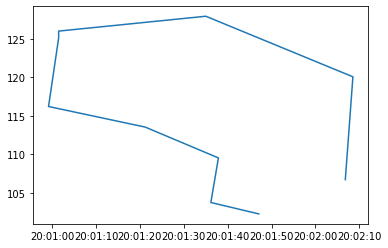

In [105]:
# Plot a region with a specific id with the `plot` function
r2d.plot(region_ids[0])

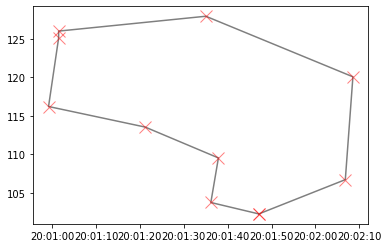

In [106]:
# Plot a closed region by using close_region=True.
# Optionally provide matplotlib kwargs for more customization.
r2d.plot(region_ids[0], close_region=True, color='k', alpha=.5, marker='x', markeredgecolor='red', markersize=12)

In [107]:
r2d.select_region(region_ids)

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,...,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
10,x1,EVRG,7,12.0.341.42620,11,13,10,0,2,-1,...,2017-06-25 20:02:08.535700,102.255201,127.947603,Unknown,1,Chicken nugget,"[2017-06-25T20:01:47.093000000, 2017-06-25T20:...","[102.2552007996, 103.7403107496, 109.532239554...",[],[]


## Plotting regions on an echogram

#### Reading Preprocessed Sonar Files

We have converted and calibrated a sample of echosounder files from the same transect and stored them in `.nc`. We can directly read them with the `xarray` library. 

In [108]:
# mounting the google drive (uncomment if you have permission to read directly from Google Drive)
# from google.colab import drive
# drive.mount('/content/drive/') 

In [109]:
# Paths for Google Drive read  (uncomment if you have permission to read directly from Google Drive)
# SONAR_PATH_Sv = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/Sv/'
# SONAR_PATH_raw = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/raw_converted/'

In [64]:
# download a zipped sample folder from publicly available Google Drive
import gdown

url = 'https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S'
output = 'sample.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S
To: /Users/valentina/projects/echoregions/notebooks/sample.zip

  0%|                                                       | 0.00/1.67G [00:00<?, ?B/s]
  0%|                                                | 524k/1.67G [00:00<31:14, 890kB/s]
  0%|                                              | 1.05M/1.67G [00:00<23:34, 1.18MB/s]
  0%|                                              | 1.57M/1.67G [00:01<20:39, 1.35MB/s]
  0%|                                              | 2.10M/1.67G [00:01<19:27, 1.43MB/s]
  0%|                                              | 2.62M/1.67G [00:01<18:59, 1.46MB/s]
  0%|                                              | 3.15M/1.67G [00:02<16:52, 1.65MB/s]
  0%|                                              | 3.67M/1.67G [00:02<16:40, 1.67MB/s]
  0%|                                              | 4.19M/1.67G [00:02<15:24, 1.80MB/s]
  0%|▏                                           

KeyboardInterrupt: 

In [ ]:
# unzip into a sample folder
!unzip -o sample.zip

In [110]:
# Paths for local read
SONAR_PATH_Sv = './sample/Sv/'
SONAR_PATH_raw = './sample/raw_converted/'

Below we make a function which selects only the echosounder files corresponding to certain regions from a bigger set of files.

The `Sv` dataset has a `range_bin` dimension and in order to convert that to actual `depth` one needs to read the water level from the platform data.

In [111]:
def read_Sv(SONAR_PATH_Sv, SONAR_PATH_raw, region_ids):
    # Select the file(s) that a region is contained in.
    raw_files = os.listdir(SONAR_PATH_raw)
    

    select_raw_files = r2d.select_sonar_file(raw_files, region_ids)
        
    # Select the file(s) that a region is contained in.
    Sv_files = os.listdir(SONAR_PATH_Sv)
    select_Sv_files = r2d.select_sonar_file(Sv_files, region_ids)
    
    # convert a single file output to a list of one element
    if type(select_Sv_files) == str:
        select_Sv_files = [select_Sv_files]
    # convert a single file output to a list of one element
    if type(select_raw_files) == str:
        select_raw_files = [select_raw_files]
        
    # reading the selected Sv files into one dataset
    Sv = xr.open_mfdataset([os.path.join(SONAR_PATH_Sv, item) for item in select_Sv_files])
    
    ## creating a depth dimension for Sv ##

    # reading the processed platform data
    ds_plat = xr.open_mfdataset([os.path.join(SONAR_PATH_raw, item) for item in select_raw_files], concat_dim='ping_time', combine='nested', group='Platform')
    # assuming water level is constant
    water_level = ds_plat.isel(location_time=0, frequency=0, ping_time=0).water_level
    del ds_plat

    Sv_range = Sv.range.isel(frequency=0, ping_time=0)

    # assuming water levels are same for different frequencies and location_time
    depth = water_level + Sv_range
    depth = depth.drop_vars('frequency')
    depth = depth.drop_vars('location_time')
    # creating a new depth dimension
    Sv['depth'] = depth
    Sv = Sv.swap_dims({'range_bin': 'depth'})
    return(Sv)

In [112]:
Sv = read_Sv(SONAR_PATH_Sv, SONAR_PATH_raw, region_ids)

In [113]:
# set the min and max depth based on the sonar files
r2d.min_depth = Sv.depth.min()
r2d.max_depth = Sv.depth.max()

In [114]:
r2d.select_region(region_ids[0])

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,...,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
10,x1,EVRG,7,12.0.341.42620,11,13,10,0,2,-1,...,2017-06-25 20:02:08.535700,102.255201,127.947603,Unknown,1,Chicken nugget,"[2017-06-25T20:01:47.093000000, 2017-06-25T20:...","[102.2552007996, 103.7403107496, 109.532239554...",[],[]


In [115]:
region_df = r2d.select_region(region_ids)

In [116]:
region_df

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,...,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
10,x1,EVRG,7,12.0.341.42620,11,13,10,0,2,-1,...,2017-06-25 20:02:08.535700,102.255201,127.947603,Unknown,1,Chicken nugget,"[2017-06-25T20:01:47.093000000, 2017-06-25T20:...","[102.2552007996, 103.7403107496, 109.532239554...",[],[]


In [117]:
region_ids

[11]

In [118]:
M = r2d.mask(Sv, region_ids, data_var="Sv", mask_var="ROI")

In [119]:
# the mask has nan's where outside of the region
M

<xarray.DataArray 'ROI' (depth: 3957, ping_time: 529)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    range_bin  (depth) int32 0 1 2 3 4 5 6 ... 3951 3952 3953 3954 3955 3956
  * depth      (depth) float64 9.15 9.15 9.15 9.34 ... 757.9 758.1 758.3 758.5
  * ping_time  (ping_time) datetime64[ns] 2017-06-25T19:59:27.270000128 ... 2...
    unix_time  (ping_time) float64 1.734e+04 1.734e+04 ... 1.734e+04 1.734e+04

In [120]:
# the region is labeled by default with 0 (if there are more regions they will be labeled 1,2,3,...)
M.min()

<xarray.DataArray 'ROI' ()>
array(0.)

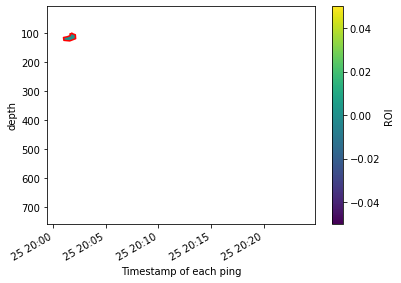

In [121]:
M.plot(yincrease=False)
r2d.plot(region_ids, close_region=True, color='r')


We can also create a masked sonar file:

In [122]:
Sv_masked = Sv.Sv.where(~M.isnull())

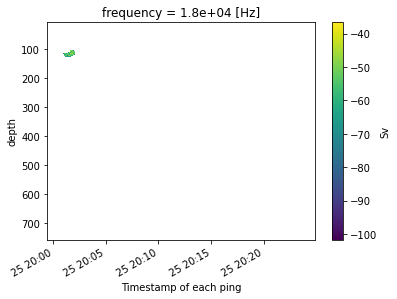

In [123]:
Sv_masked.isel(frequency=0).T.plot(yincrease=False)

One can use the masked object to calculate statistics of the region, for example, the histogram of `Sv` values:

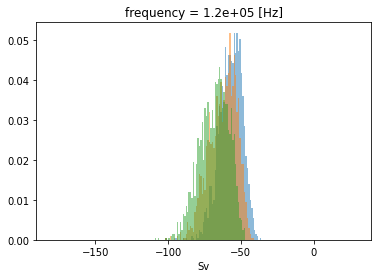

In [124]:
bins = np.arange(-180, 30, 1)
H = {}
H[18000] = Sv_masked.sel(frequency=18000).plot.hist(bins=bins, density=True, alpha=0.5, label='18K')[0]
H[38000] = Sv_masked.sel(frequency=38000).plot.hist(bins=bins, density=True, alpha=0.5, label='38K')[0]
H[120000] = Sv_masked.sel(frequency=120000).plot.hist(bins=bins, density=True, alpha=0.5, label='120K')[0]

  
# index becomes the first point of the bin
H = pd.DataFrame(H, index=bins[:-1])

#### Multiple Region Mask

The `mask` function can make a mask for several regions simultaneously:

In [125]:
region_ids = [10, 11]

In [126]:
r2d.select_region(region_ids)

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,...,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
9,x1,EVRG,7,12.0.341.42620,10,13,4,0,4,-1,...,2017-06-25 19:13:12.607500,9.244758,758.973217,Side station,0,Region10,"[2017-06-25T17:57:09.687500000, 2017-06-25T17:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
10,x1,EVRG,7,12.0.341.42620,11,13,10,0,2,-1,...,2017-06-25 20:02:08.535700,102.255201,127.947603,Unknown,1,Chicken nugget,"[2017-06-25T20:01:47.093000000, 2017-06-25T20:...","[102.2552007996, 103.7403107496, 109.532239554...",[],[]


In [127]:
Sv = read_Sv(SONAR_PATH_Sv, SONAR_PATH_raw, region_ids)

In [128]:
M = r2d.mask(Sv, region_ids, data_var="Sv", mask_var="ROI")

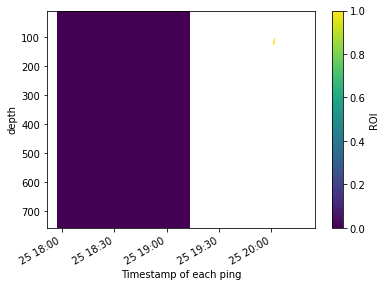

In [129]:
M.plot(yincrease=False)

In [130]:
# now the mask has labeled the regions 0 and 1, and rest is nan
np.unique(M.data)

array([ 0.,  1., nan])

If one wants to label the regions with explicit values they can pass them through the `mask_labels` variable as a list of integers.

In [131]:
M = r2d.mask(Sv, region_ids, data_var="Sv", mask_var="ROI", mask_labels=[1, 1])

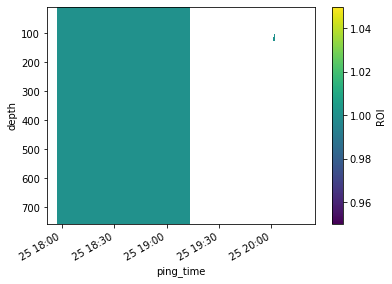

In [132]:
M.plot(yincrease=False)


Alternatively, one could use the default ids from the `.evr` files.

In [133]:
M = r2d.mask(Sv, region_ids, data_var="Sv", mask_var="ROI", mask_labels="from_ids")

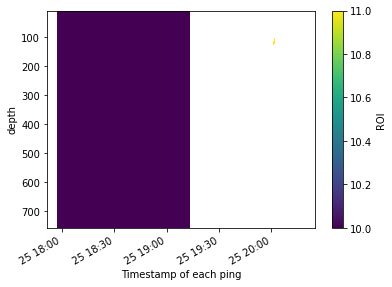

In [134]:
M.plot(yincrease=False)